# [IAPR 2020:][iapr2020] Lab 1 ‒  Image segmentation

**Author:** first name and last name  
**Due date:** 26.03.2020

[iapr2018]: https://github.com/LTS5/iapr-2020

## Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os
import time
import numpy as np

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1: Brain segmentation

Your goal: compute the size of the brain (in pixels) in a 2D image of a human head taken by Magnetic Resonance Imaging (MRI).
* Try as many methods as you can, the more the better.
* At least region growing and contour detection.

### 1.1 Brain image visualization

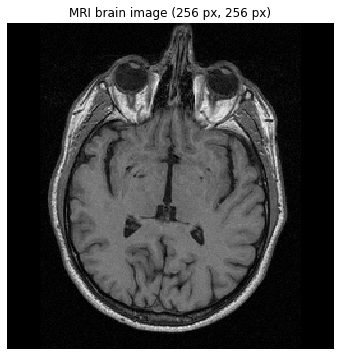

In [2]:
import skimage.io
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain_im, cmap='gray')
ax.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax.axis('off')
plt.show()

In [3]:
plot_histogram(brain_im)

NameError: name 'plot_histogram' is not defined

In [ ]:

from skimage.filters import median, gaussian
from skimage.morphology import disk, square, star


def plot_histogram(im):
    hist = exposure.histogram(im, nbins = 256)
    plt.bar(x = hist[1], height = hist[0])
    plt.title('Histogram of Image')
    plt.show()

def lower_threshold(im, thres):
    im_seg = im.copy()
    im_seg[im_seg < thres ] = 0
    im_seg[im_seg >= thres] = 189
    return im_seg

def upper_threshold(im, thres):
    thres_im = im.copy()
    thres_im[thres_im > thres] = 0
    return thres_im

def show_image(im):
    f = plt.figure(figsize = (10, 10))
    plt.imshow(im, cmap = 'gray')
    
def median_blur(im):
    blurred = median(im.copy(), disk(2))
    return blurred

def gaussian_blur(im):
    blurred = gaussian(im.copy(), sigma = 0.4)
    return blurred

In [ ]:
from skimage.morphology import opening, closing, erosion
from skimage.filters.rank import otsu

blurred = median_blur(brain_im)

blurred = upper_threshold(blurred, 90)
thres = lower_threshold(blurred, 50)
show_image(glob)


selem = disk(2)
im_open = opening(thres, selem)

show_image(im_open)

np.save('./im_open.pkl', im_open)

### 1.2 Region growing
Add your implementation and discussion

In [4]:
def collectRegion(seedx, seedy, im_arr, lower_threshold, upper_threshold):

    detected = set([(seedx,seedy)])
    visited = set()

    while len(detected):

        pix = detected.pop()
        x, y = pix

        if pix in visited: continue

        for xi in range(x-1, x+2, 2):
            try: # Accept valid positions
                if lower_threshold < op[xi, y] < upper_threshold: detected.add((xi, y))
            except: pass
        for yi in range(y-1, y+2, 2):
            try: 
                if lower_threshold < op[x, yi] < upper_threshold: detected.add((x, yi))
            except: pass

        visited.add(pix)  
    
    return visited

### 1.3 Contour detection
Add your implementation and discussion

### 1.4 Additional method(s)
Add your implementation and discussion

## Part 2: Shape/color segmentation

You will find hereafter three pictures taken under three different illuminations, containing some shapes with different colors. We ask you to create a routine to:

1. Count the number of shapes of each color.
2. Compute the total area (in pixels) of each color.

Please note that one specific challenge is to be robust to illumination changes. Therefore some kind of intensity normalization should probably be used.

**Note:** the routine(s) that you will write for this exercise will be useful for the final project as well, so pay special attention to it.

### 2.1 Visualization

In [5]:
# Load images
im_names = ['arena-shapes-01', 'arena-shapes-02', 'arena-shapes-03']
filenames = [os.path.join(data_path, name) + '.png' for name in im_names]
ic = skimage.io.imread_collection(filenames)
images = skimage.io.concatenate_images(ic)
NUM_IMAGES = images.shape[0]
NUM_COLORS = images.shape[-1]
print('Number of images: ', images.shape[0])
print('Image size: {}, {} '.format(images.shape[1], images.shape[2]))
print('Number of color channels: ', images.shape[-1])

Number of images:  3
Image size: 480, 640 
Number of color channels:  3


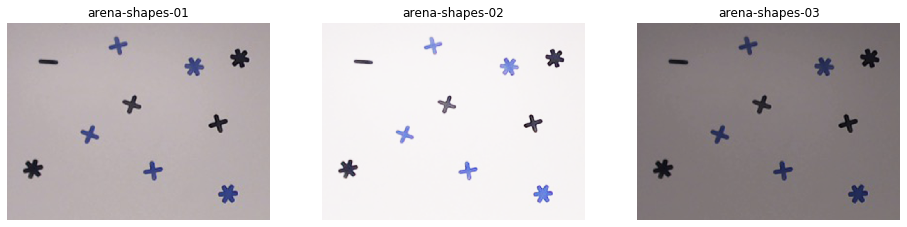

In [6]:
# Plot images
def plot_imgs(images, cmap = None, im_names = ['arena-shapes-01', 'arena-shapes-02', 'arena-shapes-03']):
    fig, axes = plt.subplots(1, NUM_IMAGES, figsize=(16, 16))
    for ax, im, nm in zip(axes.ravel(), images, im_names):
        ax.imshow(im, cmap = cmap)
        ax.axis('off')
        ax.set_title(nm)
    plt.show()

plot_imgs(images)

### Preprocessing

In this section we wish to preprocess the images such that it is possible to segment the colors regardless of image intensity. We tried different techniques here:  

- RBG to Greyscale
- Normalizing
- Standardizing
- Histogram equalization
- Intensity rescaling

In the ended up with intensity rescaling which reduces the number of distinct values in the image.  
How we tested each method follows here.

#### RGB to Greyscale
Working with greyscale is in many ways easier than RGB. However, this cannot be used here as we can see in the histogram below.  
As we only get one peak it is very difficult to distingush the different colors.

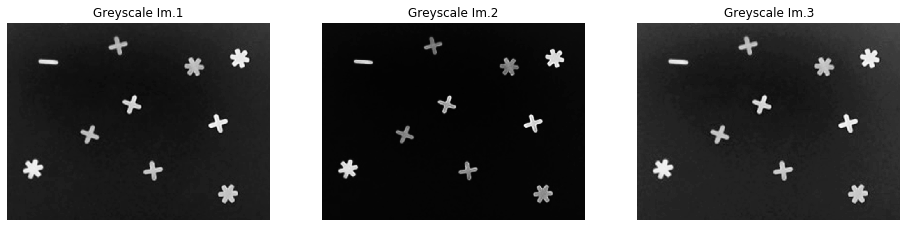

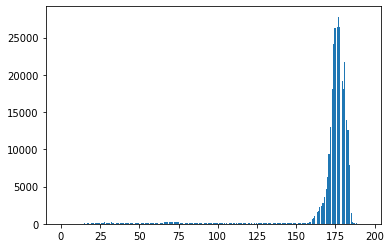

In [7]:
from skimage.color import rgb2grey
greys = [(rgb2grey(images[i])*255).astype(int) for i in range(NUM_IMAGES)]

plot_imgs(greys, cmap = 'Greys', im_names = ['Greyscale Im.1', 'Greyscale Im.2', 'Greyscale Im.3'])

plt.hist(greys[0].ravel(), bins = 256)
plt.show()


#### Normalizing images
This is done by taking advantage of the whole spectrum of 0-255 values, in each channel (RGB).  
We did not use this as the result does not differ to much from the original images.

Mean pixel value before: 174.48659288194443
Mean pixel value after: 216.29489691840277

Mean pixel value before: 241.1303949652778
Mean pixel value after: 244.39402886284722

Mean pixel value before: 118.77575629340278
Mean pixel value after: 202.63930989583332



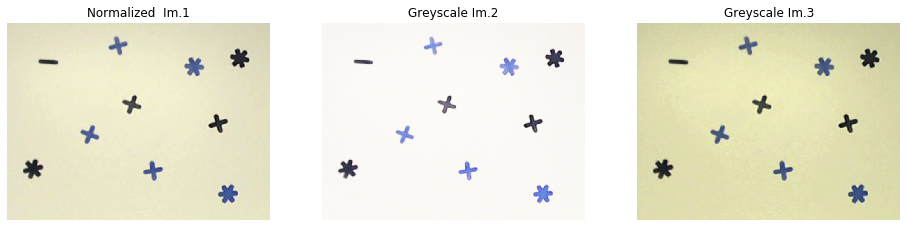

In [8]:
def normalize_img(img):
    print('Mean pixel value before:', np.mean(img) )
    img_min = img.min(axis = (0, 1))
    img_max = img.max(axis = (0, 1))
    norm_img = (((img - img_min)/(img_max-img_min))*255).astype(int)
    print('Mean pixel value after:', np.mean(norm_img))
    print()
    return norm_img
    
    
norm_imgs = [normalize_img(images[i]) for i in range(NUM_IMAGES)]
plot_imgs(norm_imgs,  im_names = ['Normalized  Im.1', 'Greyscale Im.2', 'Greyscale Im.3'])

#### Standardizing
Standardizing produces zero-mean and standard deviation of 1, but this resulted in too much loss of color information. Therefore we did not use this.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


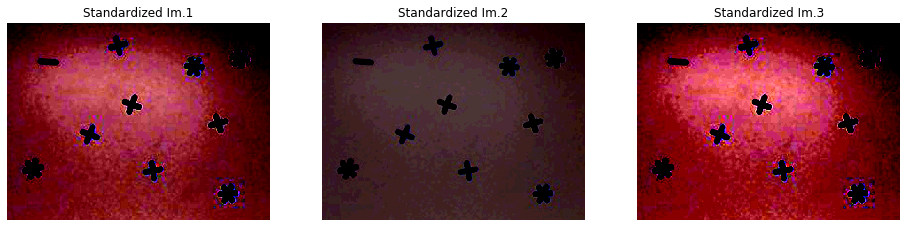

In [9]:
# Standardizing removes to much color information

def standardize_img(img):
    
    img_mean = img.mean()
    img_std = img.std()
    std_img = ((img-img_mean)/img_std)

    return std_img

std_imgs = [standardize_img(images[i]) for i in range(NUM_IMAGES)]
plot_imgs(std_imgs, im_names = ['Standardized Im.1', 'Standardized Im.2', 'Standardized Im.3'])


#### Histogram equalization
Too be honest I am not sure about what happend when using histogram equalization.
All values ended up as 0, which does not really make sense.

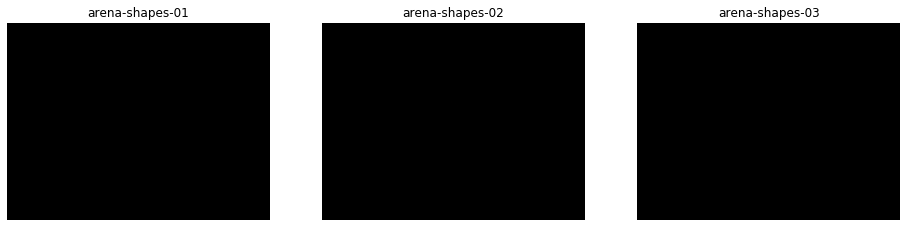

In [10]:
from skimage.exposure import equalize_hist

def histogram_equalization(org_img):
    img = org_img.copy()
    for i in range(img.shape[2]):
        img[:, :, i] = equalize_hist(img[:, :, i])
        
    return img

hist_imgs = [histogram_equalization(images[i]) for i in range(NUM_IMAGES)]
plot_imgs(hist_imgs)


#### Rescale Intensity
This ended up as the winner of the methods we tried. This uses the darker (lower) values of the image, while setting all grey parts to white. 

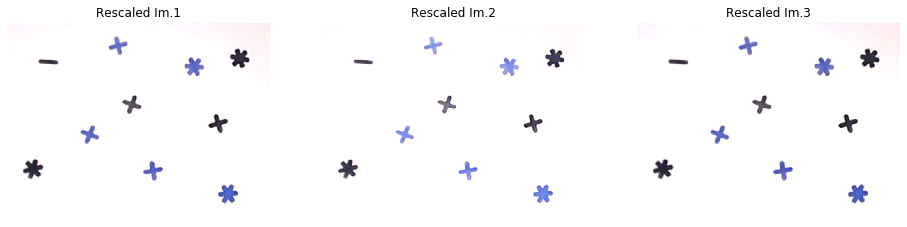

In [11]:
from skimage.exposure import rescale_intensity


def equalize_intensity(img):
    """
    """
    p2, p98 = np.percentile(img, (0, 10))
    return rescale_intensity(img, in_range=(p2,p98))


eq_imgs = [equalize_intensity(images[i]) for i in range(NUM_IMAGES)]

plot_imgs(eq_imgs, im_names = ['Rescaled Im.1', 'Rescaled Im.2', 'Rescaled Im.3'])

### 2.2 Number of shapes of each color
Add your implementation and discussion

Histogram of equalized image nr. 1


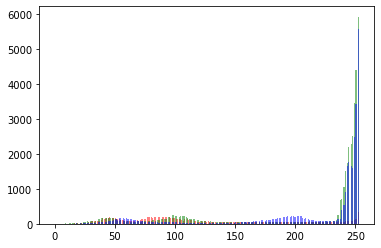

Histogram of equalized image nr. 2


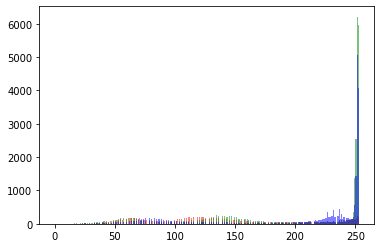

Histogram of equalized image nr. 3


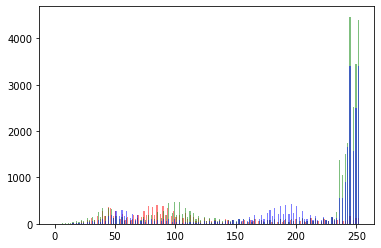

In [12]:
def remove_white(img, ch):
    '''
    Help function so that histogram is not dominated by white pixels
    '''
    img_ch = img[:,:, ch].ravel()
    return img_ch[img_ch != 255]
    
def plot_rgb_hist(img):
    ''' 
    Plots histogram of each channel/color on top of eachother.
    '''
    plt.hist(remove_white(img, 0), bins = 255, color = 'red', alpha = 0.5)
    plt.hist(remove_white(img, 1), bins = 255, color = 'green', alpha = 0.5)
    plt.hist(remove_white(img, 2), bins = 255, color = 'blue', alpha = 0.5)
    
    plt.show()

for i in range(3):
    print('Histogram of equalized image nr.', i + 1)
    plot_rgb_hist(eq_imgs[i])
    
plt.show()

As we can see, we have some distinct peaks which we can use for thresholding, although there are many values around white.

## Segmentation
In this section we wish to do thresholding and labeling of the regions

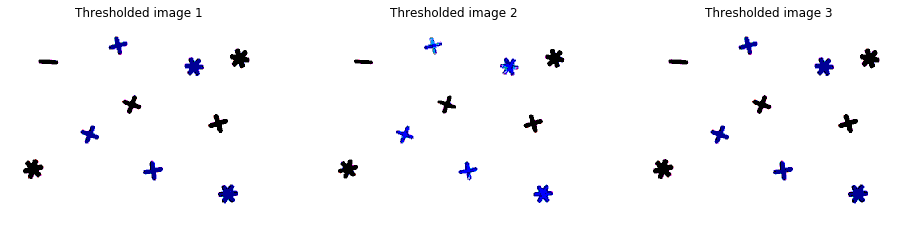

In [13]:
def thresholding(img):
    '''
    Has a lower and upper threshold which is used to segment the two colors
    Values have been found from looking at histogram.
    '''
    lt = 160
    ut = 230
    
    thres_img = img.copy()
    
    thres_img[thres_img < lt] = 0
    thres_img[(thres_img >= lt) & (thres_img < ut) ] = 150
    thres_img[thres_img >= ut] = 255
    
    return thres_img
    

imgs_thres = [thresholding(eq_imgs[i]) for i in range(NUM_IMAGES)]
plot_imgs(imgs_thres, im_names = ['Thresholded image 1', 'Thresholded image 2', 'Thresholded image 3'])

### Region Growing

In [14]:
def is_white(pixel):
    '''
    Check if all RBG values are white
    '''
    return  np.all(np.isin(pixel, 255))

def collect_region(start, im_arr):
    '''
    Moves out from start and ads pixel to region if it is not white.
    Is running as long as there are are connected non-white pixels.
    '''

    detected = set([start])
    visited = set()

    x_min = y_min = 0
    x_max, y_max = im_arr.shape[0:2]
    
    while len(detected):
        
        pix = detected.pop()
        if pix in visited: continue

        x, y = pix
        for xi in range(max(x-2, x_min), min(x+2, x_max), 1):
            if not is_white(im_arr[xi, y]): detected.add((xi, y))
        for yi in range(max(y-2, y_min), min(y+2, y_max), 1):
             if not is_white(im_arr[x, yi]): detected.add((x, yi))
        
        visited.add(pix)  
    
    return visited


In [15]:
def region_growing(img):
    
    '''
    Goes through all pixels and adds region.
    Has a minimum region-size in case of left out pixels.
    
    '''
    
    min_region_size = 50
    regions = []
    visited_pixels = set()
    
    tic = time.time()
    count = 0
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            
            if is_white(img[row, col]) or (row, col) in visited_pixels: continue
            count -=- 1
            region = collect_region((row, col), img)
            
            if len(region) > min_region_size: regions.append(region)
            visited_pixels |= region
            
    toc = time.time()

    print('Found {} regions in {} seconds.'.format(len(regions), np.around(toc-tic)))
    return regions


Executing function: equalize_intensity



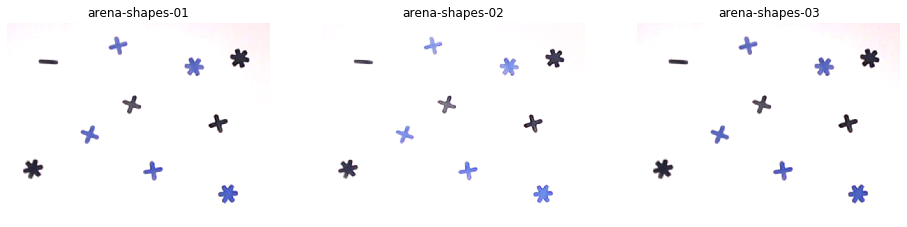

Executing function: thresholding



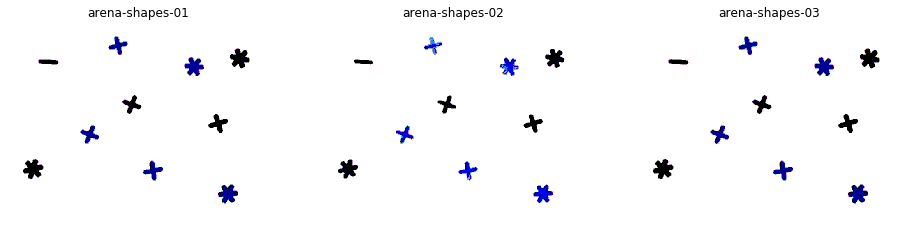

Executing function: region_growing

Found 10 regions in 6.0 seconds.
Found 10 regions in 6.0 seconds.
Found 10 regions in 6.0 seconds.


In [19]:
from skimage.filters import median

def pipeline(imgs, functions, visual = False):
    '''
    Help function to easily test different combinations of functions.
    
    '''
    for f in functions:
        print('Executing function: {}\n'.format(f.__name__))
        imgs = [f(imgs[i]) for i in range(NUM_IMAGES)]
        if visual and f.__name__ != 'region_growing':
            try:
                plot_imgs(imgs)
            except: 
                pass
        
    return imgs

imgs_regions = pipeline(images, [equalize_intensity, thresholding, region_growing], visual = True)

### Label Regions

In [20]:
def calculate_regions_mean(img, regions):
    '''
    Returns the mean of each region in one image.
    
    '''
    np_regions = []
    for region in regions:
        np_region = []
        for x, y in region:
            np_region.append(img[x, y])
        np_regions.append(np.asarray(np_region).mean())
    
    return np.asarray(np_regions)
            

def label_regions(means):
    '''
    Return array with color of each region.
    '''
    threshold = means.mean() # Calculate average value of means
    labels = []
    for region, mean in enumerate(means):
        if mean >= threshold:
            labels.append('blue')
        else: 
            labels.append('black')
    
    return np.asarray(labels)
    
    
regions_mean = calculate_regions_mean(imgs_thres[0], imgs_regions[0])
labels = label_regions(regions_mean)


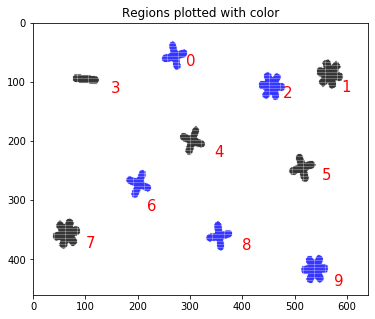

In [21]:
def plot_regions(regions, labels):
    '''
    Used to plot the regions to check results.
    
    '''
    f = plt.figure(figsize = (6,5))
    for nr, region in enumerate(regions):
        for x, y in region:
            plt.scatter(y, x, s = 0.01, color = labels[nr] )

        plt.text(y + 25, x + 25, nr, fontsize = 15, color = 'red')
    
    x_min, x_max, y_min, y_max = 0, 640, 0, 460
    plt.axis([x_min, x_max, y_max, y_min]) # Revert y_axis

    plt.title('Regions plotted with color')
    plt.show()
        
plot_regions(imgs_regions[0], labels)

### Results

In [22]:
true_labels = np.asarray(['blue', 'black', 'blue', 'black', 'black', 'black', 'blue',
       'black', 'blue', 'blue'])
print('Accuracy of segmentation: {}%'.format(np.mean(labels == true_labels)*100))
colors, count = np.unique(labels, return_counts = True) 
for i in range(len(colors)):
    print('Found {} objects in the color {}'.format(count[i], colors[i]))

Accuracy of segmentation: 100.0%
Found 5 objects in the color black
Found 5 objects in the color blue


### 2.3 Total area (in pixels) of each color
Add your implementation and discussion

In [23]:
def calculate_color_area(img_regions, labels):
    '''
    Calculates the area of each region based on found regions and labelling.
    
    '''
    area_blue = 0
    area_black = 0
    for i, region in enumerate(img_regions):
        if labels[i] == 'blue':
            area_blue += len(region)
        else:
            area_black += len(region)
            
    return area_blue, area_black
    
    
    
area_blue, area_black = calculate_color_area(imgs_regions[0], labels)

print('Number of blue pixels: {}. Number of black pixels: {}.'.format(area_blue, area_black))

Number of blue pixels: 6108. Number of black pixels: 5910.
